<a href="https://colab.research.google.com/github/dhavalsimaria/MachineLearning/blob/master/Anomaly%20Detection/anomaly_detection_pyod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from keras.engine.saving import model_from_json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
!pip install pyod
!pip install --upgrade pyod

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 2.1MB 8.9MB/s 
  Created wheel for pyod: filename=pyod-0.8.0-cp36-none-any.whl size=105563 sha256=7b0f88f404878f87d42feb89b6a57a68575a0ccbbe8afafe32c906f6e0415c57
  Stored in directory: /root/.cache/pip/wheels/ba/a6/81/2dd042e240090f3603a686b897d03402219a86e3f61bc71184
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=a684877010fab40dad90babaea02bd9c529c28b69a5dda2ea900b107d5695b88
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=7999b02f920fa271dc4723b32259766b83d3662c3c1ba547815c1665a657d161
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod
Requirement already up-to-date: pyod in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [0]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.auto_encoder import AutoEncoder
from google.colab import files
import io

In [0]:
import pickle

In [49]:
uploaded = files.upload()

Saving demo-friday.xlsx to demo-friday.xlsx


In [0]:
train_df = pd.read_excel(io.BytesIO(uploaded["data-train.xlsx"]))

In [0]:
test_df = pd.read_excel(io.BytesIO(uploaded["demo-friday.xlsx"]))

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   _id                  1655 non-null   object        
 1   dbtradrlineh2        1655 non-null   object        
 2   DBTRADRLINEH1        1655 non-null   object        
 3   PMTINFIDH            1655 non-null   object        
 4   CDTRCTRY             1655 non-null   object        
 5   PMTPURPH             1655 non-null   object        
 6   CDTRBANK             1655 non-null   object        
 7   IPTRREFIDH           1655 non-null   object        
 8   ULTMTCDTRNM          1655 non-null   object        
 9   URGNTPMTH            1655 non-null   object        
 10  DBTBANK              1655 non-null   object        
 11  CDTRFIBIC            1655 non-null   object        
 12  dbtiban              1655 non-null   object        
 13  instdamt             1655 non-nul

In [0]:
train_df.describe()

In [51]:
test_df.head()

,_id,DBTRADRLINEH2,DBTRADRLINEH1,PMTINFIDH,CDTRCTRY,PMTPURPH,CDTRBANK,IPTRREFIDH,ULTMTCDTRNM,URGNTPMTH,DBTBANK,CDTRFIBIC,dbtiban,instdamt,formatType,amtccy,INSTRID,DBTRCTRYH,DBTRNMH,DBTRIBANCCYH,ENDTOENDID,CREATED_BY,cdtrnm,CDCCY,internalReferenceId,RMTINF4,RMTINF2,RMTINF3,RMTINF1,BTCHBOOKGH,formatId,createdDate,DBTRFIBICH,CDTRIBAN,REQDEXCTNDTH,CDTRADRLINE1,CDTRADRLINE2,category,isAnomaly
0,SHH77OKE3PC,"P.O. Box 902, 8044 Ridiculus St.","P.O. Box 564, 7127 Id, Avenue",WWO45QUE4RM,Sudan,mollis,ICICI Bank,LGJ80MBJ0LJ,Tele Marketing Service eK,HIGH,BNP Paribas,RABONL2U,DE12345678440532013222,14,SEPA-CT,EUR,PUO56ODG2GW,Greenland,Audi US Pvt Ltd.,YEN,NGJ87NRK1RW,"Shelby, Juliet, Kamal, Lisandra",Severny Consultant,EUR,MP-2,False,False,False,False,True,BFZ51URF5DW,2020-12-22 20:56:00,DEUTDEBB160,DE32132765440532677494,2021-05-19 07:08:00,"P.O. Box 812, 4260 Rutrum Avenue","214-1840 Ornare, St.",SEPA,-1
1,MAK98KJZ9SR,"966-2773 Quis, Rd.",Ap #575-2392 Aenean St.,FZI12RVT4OG,Zambia,natoque,Deutsche Bank,XRU79PLG6RK,Parcel Service GmbH,LOW,Barclays,CAIXESBB1A3,DE12345678440532013222,2000,SEPA-CT,EUR,CSA60YGX0YA,"Bonaire, Sint Eustatius and Saba",Mercedes Germany,YEN,ICE78YTN7RL,"Uma, Kenyon, Orson, Velma","XXXXCdtr, D.",USD,MP-3,False,False,False,False,True,JTD12OMH4PH,2020-01-18 14:43:00,CITIUS33,ES4921004250712200006586,2019-08-27 23:26:00,829 Metus. Rd.,414-2309 Auctor Road,SEPA,1
2,ODE23JQQ9HN,Ap #495-3402 Libero Av.,"P.O. Box 272, 1354 In St.",RNY38SUT8HC,Ethiopia,mollis,Deutsche Bank,FIG45EOV8KQ,Tele Marketing Service eK,HIGH,BNP Paribas,HASPDEHHX2Z,DE12345678440532013222,1010,SEPA-CT,DIN,ZWP88DEB4QZ,Qatar,BMW,INR,VIV86MPS2HI,"Dean, Todd, Madison, Christian",Severny Consultant,INR,MP-35,False,False,False,False,True,PVG46SLY1VG,2020-03-16 10:26:00,DEUTDEBB160,DE32132765440532677494,2019-12-06 09:31:00,Ap #834-7712 Mauris Street,"P.O. Box 265, 6469 Ornare Av.",SEPA,-1
3,HBD66KGH0HA,Ap #991-7896 Curabitur Ave,Ap #291-755 Quisque Ave,VMF30RTQ7MS,Haiti,nec,Commerz Bank,XPZ68JDT8ES,Parcel Service GmbH,NORM,Societe Generale,INGBNL2A,DE12345678440532013222,2021,SEPA-CT,EUR,YQH48QMO4PY,Vanuatu,Serrala Group GmbH,YEN,FTU40FHX7LX,"Walter, Mona, August, Maya","XXXXCdtr, D.",EUR,MP-37,False,False,False,False,False,VUB50UBA5FP,2020-03-05 16:01:00,CITIUS33,NL40RABO0122363574,2020-02-23 13:40:00,"P.O. Box 209, 9097 Pellentesque, St.",548-9594 Facilisi. Avenue,SEPA,1


In [0]:
'''
print("Skewness: %f" % df['INSTDAMT'].skew())
print("Kurtosis: %f" % df['INSTDAMT'].kurt())
'''

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [0]:
# Method:2
#label_encoder = LabelEncoder()
#df_encoded = df.apply(label_encoder.fit_transform)

       _id  DBTRADRLINEH2  DBTRADRLINEH1  ...  CDTRADRLINE1  CDTRADRLINE2  category
0     1315           1242            107  ...           188          1480         0
1     1396           1929           1758  ...          1894           136         0
2      932            991           1277  ...           806           342         0
3       67           1180           1869  ...          1653          1933         0
4     1283           1761           1658  ...          1830           951         0
...    ...            ...            ...  ...           ...           ...       ...
1995  1580           1668            796  ...          1233          1851         0
1996  1851           1633            711  ...          1474          1229         0
1997  1024           1661           1858  ...           109          1681         0
1998  1449             80           1812  ...           233           757         0
1999   610            215           1220  ...           367           100   

In [0]:
#df_encoded.head()
#df_encoded.tail()

,_id,DBTRADRLINEH2,DBTRADRLINEH1,PMTINFIDH,CDTRCTRY,PMTPURPH,CDTRBANK,IPTRREFIDH,ULTMTCDTRNM,URGNTPMTH,DBTBANK,CDTRFIBIC,DBTIBAN,INSTDAMT,formatType,AMTCCY,INSTRID,DBTRCTRYH,DBTRNMH,DBTRIBANCCYH,ENDTOENDID,CREATED_BY,CDTRNM,CDCCY,internalReferenceId,RMTINF4,RMTINF2,RMTINF3,RMTINF1,BTCHBOOKGH,formatId,createdDate,DBTRFIBICH,CDTRIBAN,REQDEXCTNDTH,CDTRADRLINE1,CDTRADRLINE2,category
0,1315,1242,107,1949,21,273,0,1313,1,0,2,0,3,1790,0,0,187,216,0,2,1600,594,2,0,0,0,0,0,0,1,1536,335,3,1,453,188,1480,0
1,1396,1929,1758,1762,195,192,3,859,1,0,0,3,0,1791,0,0,1191,75,0,3,1023,1725,1,0,12,0,0,0,0,1,85,1598,1,0,1985,1894,136,0
2,932,991,1277,468,231,198,1,1829,0,1,2,0,0,1792,0,3,209,23,2,3,614,1851,2,2,23,0,0,0,0,1,756,670,0,1,272,806,342,0
3,67,1180,1869,632,76,186,2,1966,1,2,2,0,3,1793,0,2,401,202,2,1,1907,1254,1,1,34,0,0,0,0,0,456,1816,0,0,1920,1653,1933,0
4,1283,1761,1658,1427,128,18,3,1738,1,0,1,1,3,1794,0,2,642,191,2,2,948,1473,0,2,45,0,0,0,0,1,1161,1827,0,0,1581,1830,951,0


In [0]:
# Method:2
'''
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)
'''

In [0]:
#print(df_scaled)

[[0.65782891 0.62131066 0.05352676 ... 0.09404702 0.74037019 0.        ]
 [0.69834917 0.96498249 0.87943972 ... 0.94747374 0.06803402 0.        ]
 [0.46623312 0.49574787 0.63881941 ... 0.4032016  0.17108554 0.        ]
 ...
 [0.51225613 0.83091546 0.92946473 ... 0.05452726 0.84092046 0.        ]
 [0.72486243 0.04002001 0.90645323 ... 0.11655828 0.37868934 0.        ]
 [0.30515258 0.10755378 0.61030515 ... 0.1835918  0.05002501 0.        ]]


In [0]:
# Method:2
'''
pca = PCA(0.95)
principal_components = pca.fit_transform(df_scaled)
print(pca.n_components_)
print(pca.explained_variance_)
new_df = pd.DataFrame(data = principal_components)
'''

30
[1.28946446 1.22996557 1.20339997 1.17714536 1.15322068 1.14182042
 1.1286976  1.08871453 1.08232131 1.07558489 1.05519969 1.05072795
 1.04086036 1.02973117 1.01345434 1.00095242 0.99458983 0.97728725
 0.96269536 0.95989588 0.95413622 0.92295665 0.90587832 0.89060901
 0.88321654 0.87768528 0.86059954 0.84853575 0.83360468 0.81944264]


In [0]:
# Method:2
#new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.482703,-1.288158,-1.431506,-1.677172,0.716225,0.890323,1.765133,-0.172121,0.950542,-1.460250,-0.596504,-2.216496,-1.043390,-0.746943,2.415221,-0.911963,1.152237,-0.319476,0.768068,-0.886823,0.121913,-1.463596,0.989966,-1.647309,0.776702,-1.622423,-1.594494,1.260848,0.215382,-0.185494
1,1.862899,2.643605,-0.066166,2.014452,0.320542,-1.348268,0.175797,0.285911,1.326535,-0.205465,0.670368,1.082592,0.184079,-0.161956,2.094392,1.442003,-0.748623,-0.003056,0.836241,0.035340,-0.930272,-2.891021,-0.968394,-0.661440,-1.923382,1.026859,-0.078293,-0.598108,-0.088285,0.918042
2,1.978703,0.218411,0.931001,0.925576,1.454305,-1.779324,0.348783,-0.493631,-2.379783,0.070634,0.045425,-0.802151,0.565669,0.617329,-0.460494,0.785260,-0.009542,0.578223,0.062389,0.224915,0.010822,-0.052937,0.108378,-2.366786,-0.494484,1.087761,0.628009,0.330414,-0.446004,-1.943000
3,-0.391059,-1.447359,-2.061025,1.831421,-0.610735,-0.359157,1.704860,-0.676108,0.196753,2.525648,-0.549362,0.475808,-0.704280,-0.781484,0.381294,0.908111,-1.408111,0.698399,1.840395,0.703186,0.229461,0.938698,0.309446,-0.760950,-0.924404,-0.325138,-0.071159,0.451070,1.617637,0.144809
4,-0.679756,0.081273,-0.370749,3.044042,-0.883188,-1.215499,1.313814,0.039808,0.906177,0.522292,-1.386080,1.017284,0.720794,0.257744,1.701070,-0.034062,-1.131264,0.478070,-0.256429,-0.438720,0.772072,-1.412067,0.613167,-0.180853,-0.992737,0.223654,0.809151,1.026208,0.092085,0.153593


In [53]:
label_encoder = LabelEncoder()
train_df['dbtiban'] = label_encoder.fit_transform(train_df['dbtiban'])
train_df['amtccy'] = label_encoder.fit_transform(train_df['amtccy'])
train_df['cdtrnm'] = label_encoder.fit_transform(train_df['cdtrnm'])

test_df['dbtiban'] = label_encoder.fit_transform(test_df['dbtiban'])
test_df['amtccy'] = label_encoder.fit_transform(test_df['amtccy'])
test_df['cdtrnm'] = label_encoder.fit_transform(test_df['cdtrnm'])
'''scaler = MinMaxScaler(feature_range=(0, 1))
df[['DBTIBAN', 'INSTDAMT']] = scaler.fit_transform(df[['DBTIBAN', 'INSTDAMT']])
df[['DBTIBAN', 'INSTDAMT']].head()'''

"scaler = MinMaxScaler(feature_range=(0, 1))\ndf[['DBTIBAN', 'INSTDAMT']] = scaler.fit_transform(df[['DBTIBAN', 'INSTDAMT']])\ndf[['DBTIBAN', 'INSTDAMT']].head()"

In [0]:
'''
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(train_df)
train_df['DBTIBAN'] = one_hot_encoder.fit_transform(train_df['DBTIBAN'])
train_df['AMTCCY'] = one_hot_encoder.fit_transform(train_df['AMTCCY'])
train_df['CDTRNM'] = one_hot_encoder.fit_transform(train_df['CDTRNM'])

test_df['DBTIBAN'] = one_hot_encoder.fit_transform(test_df['DBTIBAN'])
test_df['AMTCCY'] = one_hot_encoder.fit_transform(test_df['AMTCCY'])
test_df['CDTRNM'] = one_hot_encoder.fit_transform(test_df['CDTRNM'])
'''

In [0]:
X1 = train_df['dbtiban'].values.reshape(-1, 1)
X2 = train_df['instdamt'].values.reshape(-1, 1)
X3 = train_df['amtccy'].values.reshape(-1, 1)
X4 = train_df['cdtrnm'].values.reshape(-1, 1)
X_train = np.concatenate((X1, X2, X3, X4), axis=1)
y_train = train_df['isAnomaly']

X5 = test_df['dbtiban'].values.reshape(-1, 1)
X6 = test_df['instdamt'].values.reshape(-1, 1)
X7 = test_df['amtccy'].values.reshape(-1, 1)
X8 = test_df['cdtrnm'].values.reshape(-1, 1)
X_test = np.concatenate((X5, X6, X7, X8), axis=1)
y_test = test_df['isAnomaly']

In [55]:
print(len(X_test))

4


In [0]:
# Method:2
'''
X1 = df_scaled['DBTIBAN'].values.reshape(-1, 1)
X2 = df_scaled['INSTDAMT'].values.reshape(-1, 1)
X = np.concatenate((X1, X2), axis=1)
'''

In [0]:
df.plot.scatter(X, y)

In [0]:
def iqr_bounds(scores,k=1.5):
    q1 = scores.quantile(0.25)
    q3 = scores.quantile(0.75)
    iqr = q3 - q1
    lower_bound=(q1 - k * iqr)
    upper_bound=(q3 + k * iqr)
    print("Lower bound:{} \nUpper bound:{}".format(lower_bound,upper_bound))
    return lower_bound,upper_bound

In [0]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
classifiers = {
               #'K Nearest Neighbours(KNN)': KNN(contamination=outliers_fraction),
               #'Isolation Forest': IForest(contamination=outliers_fraction, random_state=random_state),
               'autoencoder': AutoEncoder(hidden_neurons =[4, 2, 2, 4], contamination=outliers_fraction)
               }

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_61 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_72 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_62 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_73 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_63 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_74 (Dense)             (None, 2)               

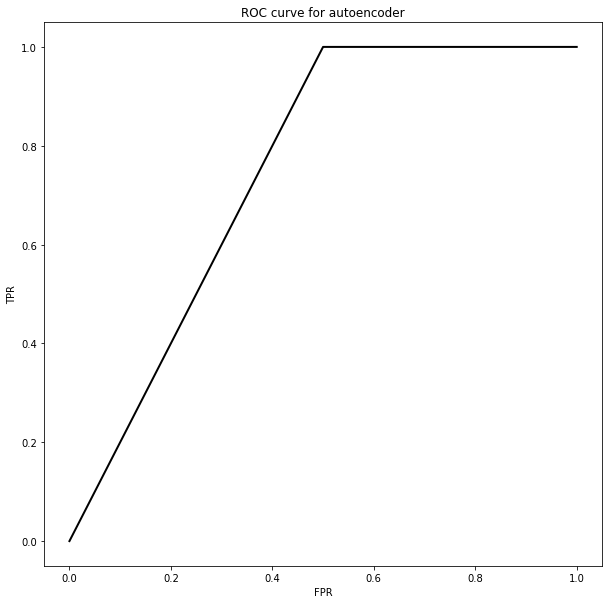

[[1 1]
 [0 2]]


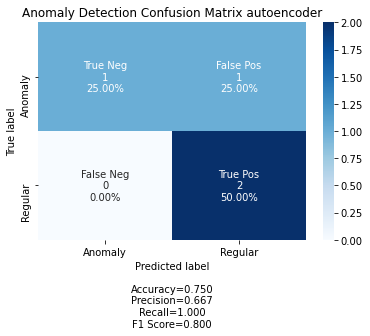

In [56]:

xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    classifier = clf.fit(X_train)

    # save the model
    ##serialize model to JSON
    model_json = classifier.model_.to_json()
    with open(clf_name+".json", "w") as json_file:
        json_file.write(model_json)
    ##serialize weights to HDF5
    classifier.model_.save_weights(clf_name+".h5")
    with open(clf_name+"_model.pickle", 'wb') as handle:
        pickle.dump(classifier, handle, protocol=pickle.HIGHEST_PROTOCOL)


    ##########################################################################
    ##load the auto encoder instance
    with open("autoencoder_model.pickle", 'rb') as handle:
        ad_model = pickle.load(handle)

    # load json and create model
    json_file = open('autoencoder.json', 'r')
    loaded_model_json = json_file.read()
    loaded_model_json = loaded_model_json.replace("\"ragged\": false,", " ")
    json_file.close()
    loaded_model_ = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model_.load_weights("autoencoder.h5")
    print("Loaded model from disk")

    ad_model.model_ = loaded_model_  ## Set the loaded model to the auto encoder instance model
    ##########################################################################
    # predict raw anomaly score
    #scores_pred = clf.decision_function(X_test) * -1
    scores_pred = ad_model.decision_function(X_test) * -1
    print(scores_pred)
    # prediction of a datapoint category outlier or inlier
    print("X_test: \n")
    print(len(X_test))
    y_pred = []
    y_pred = ad_model.predict(X_test)
    print("y_pred: \n")
    print(y_pred)
    n_outliers = len(y_pred) - np.count_nonzero(y_pred)
    n_inliers = np.count_nonzero(y_pred == 1)

    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)

    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = test_df
    dfx['outlier'] = y_pred.tolist()
    #print(dfx.head(5))

    #print(type(y_pred))
    test_df["outlier"].replace({1: -1, 0: 1}, inplace=True)
    print(test_df.head(5))
    #print(df['outlier'])
    #--------------------------------------------------------
    # Actual Outlier count.
    #actual_outliers = len(df[df['']])

    fpr, tpr, thresholds = roc_curve(y_test,test_df['outlier'])
    plt.plot(fpr, tpr, 'k-', lw=2)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    title = 'ROC curve for ' + clf_name
    plt.title(title)
    plt.savefig(title + ".jpg")
    plt.show()

    title = 'Anomaly Detection Confusion Matrix ' + clf_name
    cm = confusion_matrix(y_test, test_df['outlier'])
    print(cm)

    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['Anomaly', 'Regular']
    make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='Blues', title=title)
    #--------------------------------------------------------
    '''
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['DBTIBAN'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['INSTDAMT'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['DBTIBAN'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['INSTDAMT'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()
    '''

In [13]:
'''clf = IsolationForest(max_samples=100,
                      random_state=random_state, contamination=0.05)
clf.fit(X)
y_pred = clf.score_samples(X)
print(y_pred)

fpr, tpr, thresholds = roc_curve(y,y_pred)
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()'''

"clf = IsolationForest(max_samples=100,\n                      random_state=random_state, contamination=0.05)\nclf.fit(X)\ny_pred = clf.score_samples(X)\nprint(y_pred)\n\nfpr, tpr, thresholds = roc_curve(y,y_pred)\nplt.plot(fpr, tpr, 'k-', lw=2)\nplt.xlabel('FPR')\nplt.ylabel('TPR')\nplt.show()"

In [0]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    cm_heatmap = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    cm_heatmap_fig = cm_heatmap.get_figure()
    cm_heatmap_fig.savefig(title + ".jpg")

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)